In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_context(context="talk", 
                rc={'xtick.labelsize': 14,
                    'ytick.labelsize': 14})
colors = sns.color_palette()

In [3]:
# Original data: https://www.cdc.gov.tw/
# Aggregated data: https://www.worldometers.info/coronavirus/country/taiwan
start = "2020-02-17"
daily_cases = [2,0,1,1,2,0,2,2,1,1,0,2,5,1,1,1,0,2,1,0,0,0,2,1,1,1,3,6,8,10,23,8,27,18,16,26,21,19,17,15,16,15,8,16,7,10,9,7,8,10,3,3,1,2,3,3,5,0,2,0,0,3,22,2,3,1,1,1,1,0,0,0,0,0,0,3,0,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,1,2,0,1,0,0,0,0,3,0,0,4,5,0,0,0,7,1,0,1,0,1,0,2,1,0,0,1,0,0,1,2,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,1,1,1,0,1,2,0,0,1,0,1,3,0,3,1,2,0,0,0,1,0,0,3,0,1,1,2,0,0,1,3,2,1,3,0,0,2,1,0,1,4,0,0,5,3,1,4,0,2,0,0,0,0,3,1,1,3,5,4,1,1,4,0,4,1,2,4,5,8,3,2,1,2,2,2,2,0,6,1,0,5,2,14,9,3,24,4,6,1,4,3,23,0,2,2,4,1,8,3,4,2,7,8,2,4,3,0,4,6,0,4,3,2,8,2,2,2,3,6,4,3,2,2,3,3,3,0,6,4,4,0,1,8,4,7,6,2,3,8,3,5,0,1,3,2,4,10,2,1,3,2,2,4,1,3,1,5,2,1,1,0,0,0,0,1,2,1,1,0,0,0,4,5,0,3,1,0,0,3,2,0,7,2,7,1,1,0,6,0,1,5,0,0,8,6,1,1,0,1,2,3,1,7,2,1,1,6,6,3,6,2,1,2,0,0,4,2,1,1,4,5,1,2,2,1,3,2,4,4,4,7,3,4,6,6,5,8,3,5,8,8,7,13,5,5,1,15,11,21,25,25,113,287,539,466,543,492,438,477,497,512,503,536,537,419,429,425,394,342,488,419,343,483,314,198,218,263,257,282,251,175,185,133,170,174,185,128,109,73,78,103,130,76,80,89,60,54,55,50,58,80,39,29,29,40,21,36,33,31,24,28,27,18,32,12,18,21,24,25,33,22,25,13,11,17,20,18,25,12,14,14,19,21,11,12,10,7,8,8,16,4,18,7,9,10,18,11,6]
daily_deaths = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,2,6,6,6,11,13,19,21,10,15,13,12,17,21,37,36,26,22,25,28,24,26,26,15,8,18,19,21,20,11,20,6,24,6,5,13,9,3,8,5,13,15,10,2,1,17,9,3,12,6,4,1,6,6,6,4,1,4,1,4,5,4,2,2,0,0,1,0,0,0,0,2,0,2,0,0,3,12,3,4,1,2,1,2,2,0,0,0,0,5]
taiwan_population = 23_570_000

In [4]:
date = pd.date_range(start=start, periods=len(daily_cases), name="Date")
df = pd.DataFrame({"Daily Cases": daily_cases, "Daily Deaths": daily_deaths},
                  index=date)
df = df["2021-05-01":]

In [5]:
def makeplot():
    fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))

    ax1t = ax1.twinx()
    ax2t = ax2.twinx()
    
    def convert_to_100k(ax_raw, ax_100k):
        ratio = 100_000 / taiwan_population
        ymin, ymax = ax_raw.get_ylim()
        ax_100k.set_ylim(ymin * ratio, ymax * ratio)
        ax_100k.figure.canvas.draw()
        
    ax1.callbacks.connect("ylim_changed", lambda ax: convert_to_100k(ax, ax1t))
    ax2.callbacks.connect("ylim_changed", lambda ax: convert_to_100k(ax, ax2t))

    fig.autofmt_xdate()
    ax1.set_ylim(0, 600)
    ax2.set_ylim(0, 40)
    ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

    
    sns.lineplot(data=df["Daily Cases"], ax=ax1, color=colors[0])
    sns.lineplot(data=df["Daily Deaths"], ax=ax2, color=colors[1])
    ax1t.set_ylabel("Per 100k people", fontsize=14, labelpad=30)
    ax2t.set_ylabel("Per 100k people", fontsize=14, labelpad=10)

    annheight = 620
    textheight = 660

    p0 = mdates.date2num(df.index[15])
    p1 = mdates.date2num(df.index[29])
    p2 = mdates.date2num(df.index[75])

    ax1.annotate(text='curve flattened\nquickly', 
                 xy=((p0+p1)/2, textheight), 
                 ha='center', size=12,
                 annotation_clip=False)
    ax1.annotate(text='', xy=(p0,annheight), xytext=(p1, annheight), 
                 annotation_clip=False,
                 arrowprops=dict(color=colors[2], arrowstyle='<->'))

    ax1.annotate(text='lockdown rapidly effective', 
                 xy=((p1+p2)/2, textheight), 
                 ha='center', size=12,
                 annotation_clip=False)
    ax1.annotate(text='', xy=(p1,annheight), xytext=(p2, annheight), 
                 annotation_clip=False,
                 arrowprops=dict(color=colors[3], arrowstyle='<->'))

    fig.suptitle("Taiwan's handling of 2021 COVID Outbreak", y=1.05, fontsize=22)

    plt.show()

## Taiwan's handling of 2021 COVID Outbreak

The initial outbreak was country-wide, due to various social interactions and travel plans of the first to be infected.  The case load jumped to only about 2 cases per 100k people, thanks to the vigilence of the population prior to the outbreak.  

The government rapidly implemented a strict, but not total, shutdown.  The effect of the shutdown is seen two weeks later, in line with the incubation period of the virus.  Within 8 weeks from the initial outbreak, cases and deaths had dropped substantially.

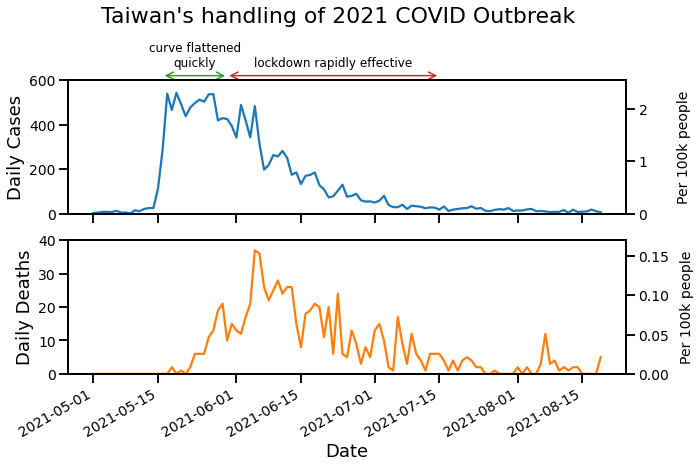

In [6]:
makeplot()